In [ ]:
!pip install roboflow
!pip install ultralytics==8.0.196

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from ultralytics import YOLO

### Load dataset from Roboflow

In [3]:
rf = Roboflow(api_key="dwoCPHTkdkpOlYwjsQgd")
project = rf.workspace("chuouniv").project("trademark-logo-detection")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to trademark-logo-detection-3 in yolov8:: 100%|██████████| 47526/47526 [00:19<00:00, 2466.49it/s]


### Load and train pre-trained YOLOv8

In [4]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 103MB/s]


In [5]:
model.train(data="data.yaml", epochs=20, imgsz=640)  # train the model

New https://pypi.org/project/ultralytics/8.0.237 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac8aeac3be0>
fitness: 0.7701548647997357
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.75625])
names: {0: 'logo'}
plot: True
results_dict: {'metrics/precision(B)': 0.847073764175325, 'metrics/recall(B)': 0.8144149853010613, 'metrics/mAP50(B)': 0.8953284380819948, 'metrics/mAP50-95(B)': 0.7562466899905959, 'fitness': 0.7701548647997357}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.2512940252670134, 'inference': 2.2463552879564688, 'loss': 0.0009005719965154475, 'postprocess': 2.0286379438458066}

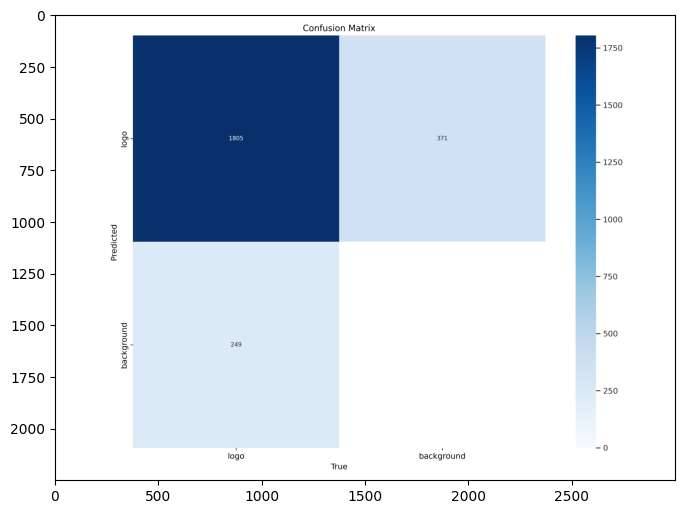

In [6]:
pil_im = Image.open('runs/detect/train/confusion_matrix.png')
plt.figure(figsize = (8,8))
plt.imshow(np.asarray(pil_im))

In [34]:
model.export()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

TorchScript: starting export with torch 2.1.0+cu121...
TorchScript: export success ✅ 2.2s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (4.2s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'

### Inference


image 1/1 /content/Sample-Invoice-printable.png: 640x512 2 logos, 14.7ms
Speed: 3.3ms preprocess, 14.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict5


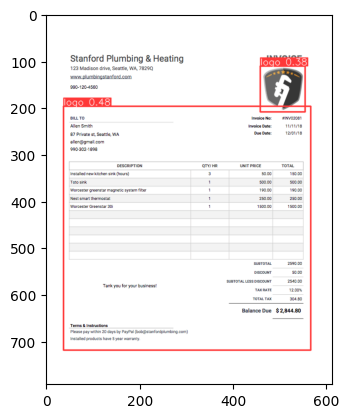

In [38]:
model = YOLO('./runs/detect/train/weights/best.pt')
model.predict('Sample-Invoice-printable.png', save=True, imgsz=640, conf=0.3)
plt.imshow(np.asarray(Image.open('runs/detect/predict4/Sample-Invoice-printable.png')))

In [9]:
# crop the image to retain only the top part
img = Image.open("Sample-Invoice-printable.png")
width, height = img.size
top_height = height // 3
cropped = img.crop((0, 0, width, top_height))
cropped.save("cropped.png")


image 1/1 /content/cropped.png: 288x640 1 logo, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 2.7ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/predict5


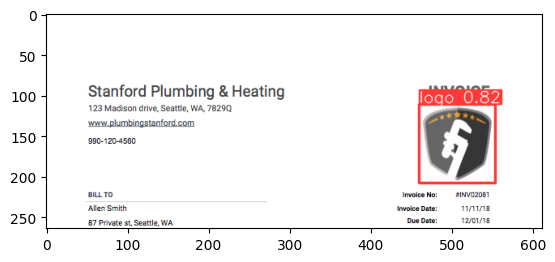

In [39]:
# inference using the cropped image
model.predict('cropped.png', save=True, imgsz=640, conf=0.3)
# the final result
plt.imshow(np.asarray(Image.open('runs/detect/predict4/cropped.png')))

The model was trained on logo images instead of documents containing logos. Better detection was observed when the document was cropped to retain only the top part, where logos are typically located. Training the model with actual document images should improve the model's performance.


image 1/1 /content/service-invoice.jpeg: 640x480 1 logo, 18.2ms
Speed: 3.8ms preprocess, 18.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict4


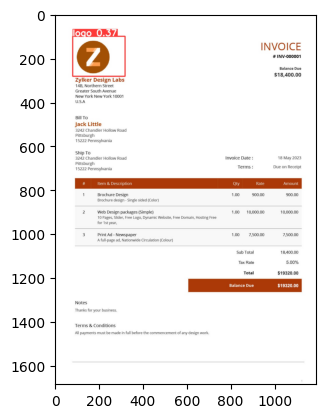

In [36]:
# try another document
model.predict('service-invoice.jpeg', save=True, imgsz=640, conf=0.3)
plt.imshow(np.asarray(Image.open('runs/detect/predict4/service-invoice.jpeg')))


image 1/1 /content/breeze_invoice.jpeg: 640x512 1 logo, 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict4


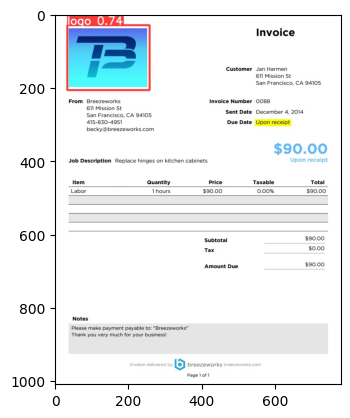

In [35]:
model.predict('breeze_invoice.jpeg', save=True, imgsz=640, conf=0.3)
plt.imshow(np.asarray(Image.open('runs/detect/predict4/breeze_invoice.jpeg')))